In [25]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir


'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/daisy/2479956481_8d1a9699be_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4281102584_c548a69b81_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/4144275653_7c02d47d9b.jpg'),
 PosixPath('datasets/flower_photos/daisy/6208851904_9d916ebb32_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/16527403771_2391f137c4_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2561371688_c80a4fe957_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/18679421522_3be9879e32.jpg'),
 PosixPath('datasets/flower_photos/daisy/3713290261_8a66de23ab.jpg'),
 PosixPath('datasets/flower_photos/daisy/2617111535_54c2ac8462.jpg'),
 PosixPath('datasets/flower_photos/daisy/253426762_9793d43fcd.jpg'),
 PosixPath('datasets/flower_photos/daisy/2901376034_cdb4bac26b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/5109508979_68e3530791_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/147068564_32bb4350cc.jpg'),
 PosixPath('datasets/flower_photos/daisy/2087343668_ef4fb95787_n.jpg'),
 Pos

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [7]:
roses = list(data_dir.glob('roses/*'))
roses

[PosixPath('datasets/flower_photos/roses/537207677_f96a0507bb.jpg'),
 PosixPath('datasets/flower_photos/roses/5960270643_1b8a94822e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9614492283_66020fb4eb_n.jpg'),
 PosixPath('datasets/flower_photos/roses/13231224664_4af5293a37.jpg'),
 PosixPath('datasets/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('datasets/flower_photos/roses/7551637034_55ae047756_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14993880427_95d0f27257.jpg'),
 PosixPath('datasets/flower_photos/roses/15424480096_45bb574b33.jpg'),
 PosixPath('datasets/flower_photos/roses/8644003462_2272de26eb.jpg'),
 PosixPath('datasets/flower_photos/roses/2258973326_03c0145f15_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4360743371_6238b36d8c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg'),
 PosixPath('datasets/flower_photos/roses/14880561916_79aeb812fd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15174615529_144ae28bdb_n.jpg'),
 Po

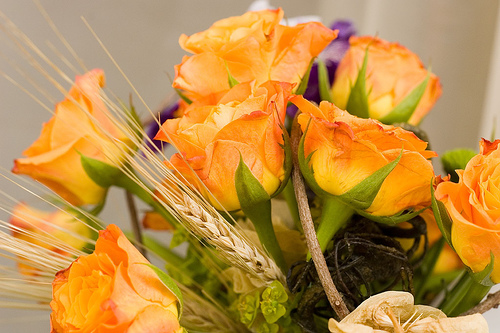

In [8]:
PIL.Image.open(str(roses[4]))

In [10]:
flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*'))
}

In [11]:
flowers_labels_dict ={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}


In [12]:
flower_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/537207677_f96a0507bb.jpg')

array([[[188, 188, 188],
        [223, 223, 223],
        [219, 219, 219],
        ...,
        [220, 220, 220],
        [224, 224, 224],
        [157, 157, 157]],

       [[223, 223, 223],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [187, 187, 187]],

       [[219, 219, 219],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [183, 183, 183]],

       ...,

       [[219, 219, 219],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [183, 183, 183]],

       [[223, 223, 223],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [188, 188, 188]],

       [[188, 188, 188],
        [223, 223, 223],
        [219, 219, 219],
        ...,
        [221, 221, 221],
        [224, 224, 224],
        [157, 157, 157]]], dtype=uint8)
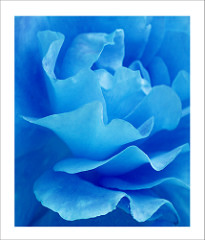

In [ ]:
img = cv2.imread(str(flower_images_dict['roses'][1]))
img

In [24]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
from ctypes import resize
X,y = [],[]

for flower_name,images in flower_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [15]:
y[:5]

[0, 0, 0, 0, 0]

In [16]:
X[:5]

[array([[[ 15,  19,  18],
         [ 14,  22,  20],
         [ 25,  30,  31],
         ...,
         [ 52,  58,  54],
         [ 53,  54,  51],
         [ 42,  46,  44]],
 
        [[ 15,  20,  19],
         [ 14,  20,  19],
         [ 29,  34,  35],
         ...,
         [ 50,  54,  50],
         [ 53,  56,  53],
         [ 48,  51,  49]],
 
        [[ 17,  22,  21],
         [ 14,  19,  18],
         [ 30,  35,  36],
         ...,
         [ 51,  53,  49],
         [ 48,  54,  50],
         [ 53,  56,  54]],
 
        ...,
 
        [[ 15,  42,  25],
         [ 91, 125,  96],
         [209, 180, 156],
         ...,
         [ 22,  32,  36],
         [ 27,  38,  46],
         [ 28,  46,  48]],
 
        [[ 58, 104,  80],
         [ 39,  93,  56],
         [193, 160, 138],
         ...,
         [ 23,  30,  35],
         [ 25,  37,  43],
         [ 53,  72,  69]],
 
        [[ 36,  81,  54],
         [ 46,  89,  64],
         [144, 134, 116],
         ...,
         [ 23,  33,  37],
  

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [19]:
X_train_Scaled = X_train/255
X_test_Scaled = X_test/255

In [20]:
X_train_Scaled[0]

array([[[0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98431373, 0.98431373, 0.98431373],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98431373, 0.98431373, 0.98431373],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.94901961, 0

In [43]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16,3, padding = 'same',activation = 'relu', input_shape =(180, 180, 3) ),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)

])

model.compile(optimizer = "adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_Scaled,y_train,epochs=10)

NameError: name 'img_height' is not defined

In [23]:
model.evaluate(X_test_Scaled,y_test)

29/29 [==============================] - 1s 25ms/step - loss: 1.8715 - accuracy: 0.6394


[1.8714711666107178, 0.6394335627555847]

In [29]:
predictions = model.predict(X_test_Scaled)
predictions

29/29 [==============================] - 1s 25ms/step


array([[  6.462664  ,   8.479994  ,  -4.6518564 ,   2.8882349 ,
        -11.5377245 ],
       [  0.8213986 ,   7.816198  ,   0.79265404,  -8.761865  ,
         -1.9525018 ],
       [ -1.7053262 ,  -9.880398  ,  -5.2800965 ,   0.31904414,
         18.635437  ],
       ...,
       [ -0.827144  ,  -3.632659  ,   5.7007403 ,  -3.308246  ,
          0.2499526 ],
       [  0.8968044 ,  -4.457389  ,   3.9961128 ,  -6.4161983 ,
          2.7095218 ],
       [ -4.197571  ,  -5.1967497 ,  10.982523  , -10.618747  ,
          0.6003962 ]], dtype=float32)

In [30]:
predictions[:5]

array([[  6.462664  ,   8.479994  ,  -4.6518564 ,   2.8882349 ,
        -11.5377245 ],
       [  0.8213986 ,   7.816198  ,   0.79265404,  -8.761865  ,
         -1.9525018 ],
       [ -1.7053262 ,  -9.880398  ,  -5.2800965 ,   0.31904414,
         18.635437  ],
       [ -0.29828006,  -4.2692075 ,   1.8157221 ,   3.9080417 ,
         -2.255767  ],
       [ -2.2661893 ,  -2.2490249 ,   6.542092  ,  -8.650389  ,
         -0.23805363]], dtype=float32)

In [31]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.1701012e-01, 8.7970811e-01, 1.7428038e-06, 3.2799607e-03,
       1.7813676e-09], dtype=float32)>

In [32]:
np.argmax(score)

1

In [34]:
y_test[0]

1

In [35]:
data_augmentation = keras.Sequential([
      layers.experimental.preprocessing.RandomFlip('horizontal',
                                                input_shape = (180,180,3)),


      layers.experimental.preprocessing.RandomZoom(0.3),
      layers.experimental.preprocessing.RandomRotation(0.2)
])

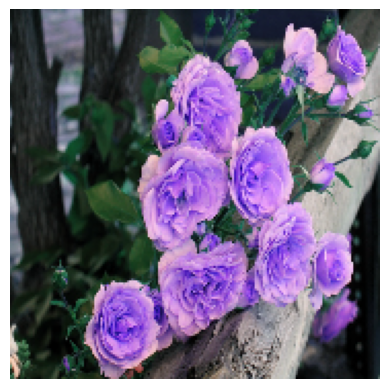

In [36]:
plt.axis('off')
plt.imshow(X[0])

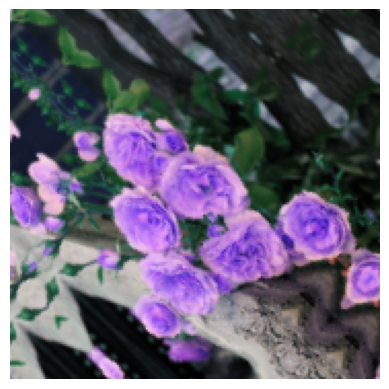

In [37]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [40]:
num_classes = 5

model = Sequential([

    data_augmentation,
    layers.Conv2D(16,3, padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_Scaled,y_train,epochs=10)


Epoch 1/10
86/86 [==============================] - 12s 120ms/step - loss: 1.2828 - accuracy: 0.4575
Epoch 2/10
86/86 [==============================] - 10s 120ms/step - loss: 1.0551 - accuracy: 0.5596
Epoch 3/10
86/86 [==============================] - 10s 117ms/step - loss: 0.9938 - accuracy: 0.6072
Epoch 4/10
86/86 [==============================] - 10s 116ms/step - loss: 0.8893 - accuracy: 0.6541
Epoch 5/10
86/86 [==============================] - 10s 118ms/step - loss: 0.8569 - accuracy: 0.6668
Epoch 6/10
86/86 [==============================] - 10s 116ms/step - loss: 0.8154 - accuracy: 0.6820
Epoch 7/10
86/86 [==============================] - 10s 117ms/step - loss: 0.7971 - accuracy: 0.6842
Epoch 8/10
86/86 [==============================] - 10s 118ms/step - loss: 0.7406 - accuracy: 0.7118
Epoch 9/10
86/86 [==============================] - 10s 116ms/step - loss: 0.7342 - accuracy: 0.7100
Epoch 10/10
86/86 [==============================] - 10s 121ms/step - loss: 0.7189 - accura

In [41]:
model.evaluate(X_test_Scaled,y_test)

29/29 [==============================] - 1s 28ms/step - loss: 0.7962 - accuracy: 0.6895


[0.7962241172790527, 0.6895424723625183]